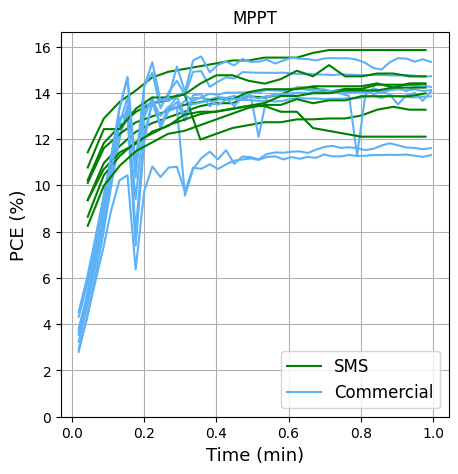

<Figure size 640x480 with 0 Axes>

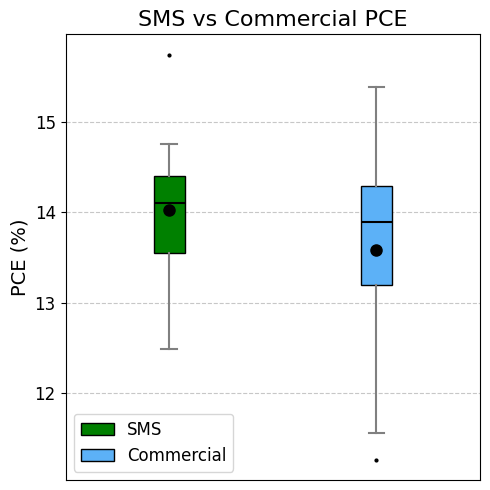

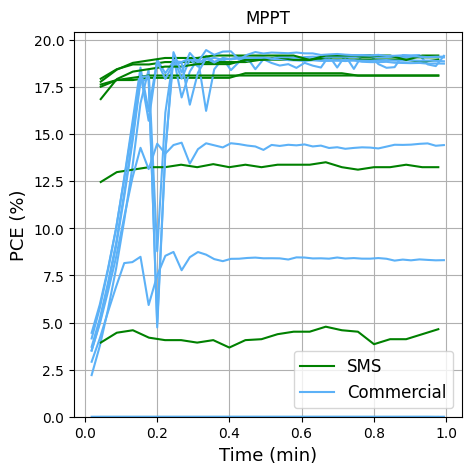

<Figure size 640x480 with 0 Axes>

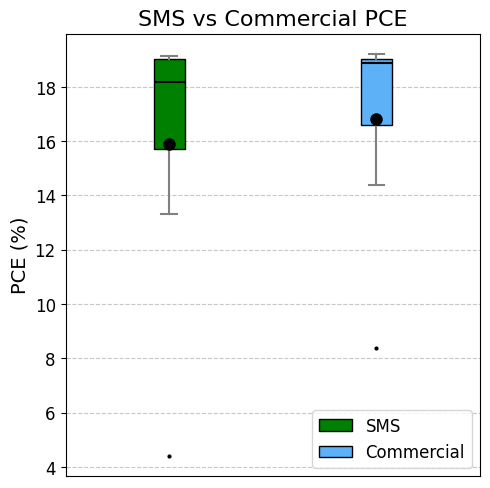

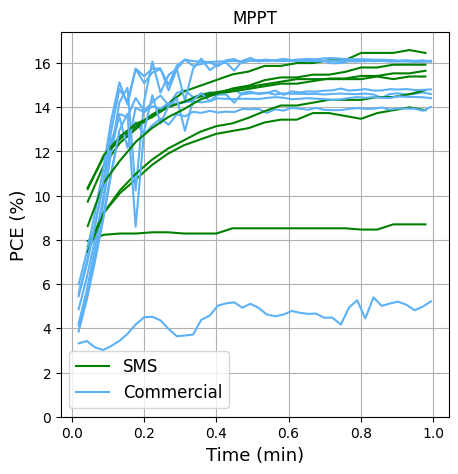

<Figure size 640x480 with 0 Axes>

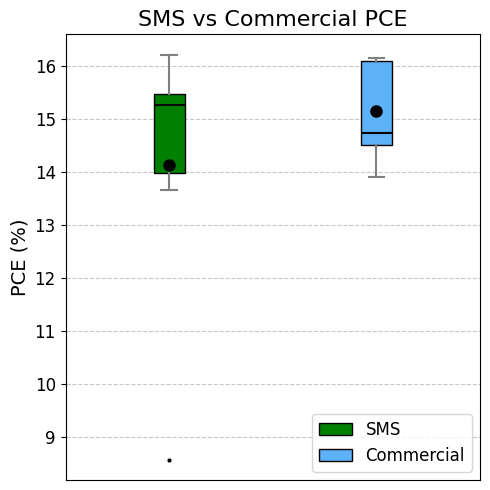

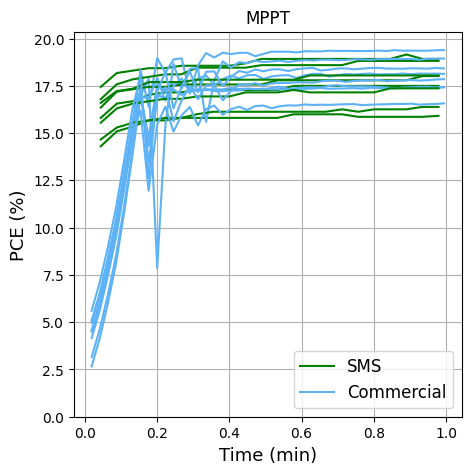

<Figure size 640x480 with 0 Axes>

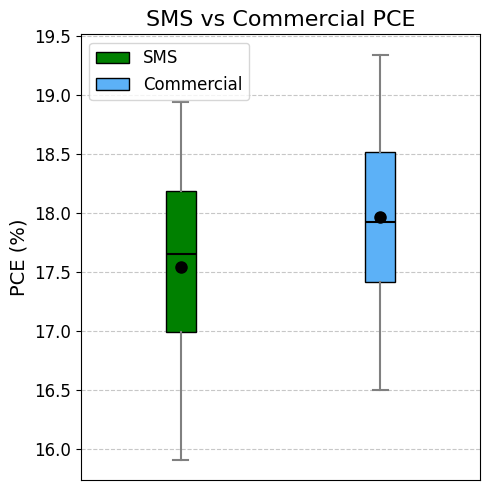

min diff: 0.15491698870908976 at idx: 0
Average PCE absolute difference: 1.3918579077895465
Average PCE diff across device: 0.44773605967136376

min diff: 0.007020526159273288 at idx: 2
Average PCE absolute difference: 0.939523396184935
Average PCE diff across device: 0.9375175315679982

min diff: 0.07164058781527416 at idx: 2
Average PCE absolute difference: 1.1779451489929353
Average PCE diff across device: 1.0070838589630107

min diff: 0.052219715328000404 at idx: 0
Average PCE absolute difference: 0.4384994366235462
Average PCE diff across device: 0.42544450779154275

total_diff 0.9821712857183279
total device diff 0.7044454894984788


In [34]:
# %matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import numpy_indexed as npi
from labellines import labelLines
from matplotlib.font_manager import FontProperties
import os
import sys
import re
np.set_printoptions(threshold=sys.maxsize)
from matplotlib.cbook import boxplot_stats
from matplotlib.patches import Patch

def get_outlier_indices(data):
    data = np.asarray(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_mask = (data < lower_bound) | (data > upper_bound)
    return np.where(outlier_mask)[0]

def detect_settled_index(t, P, window, thresh):
    t = np.asarray(t, dtype=float)
    P = np.asarray(P, dtype=float)

    # --- rest of your function unchanged --------------------
    for start in np.arange(t[0], t[-1] - window, window):
        end   = start + window
        mask  = (t >= start) & (t <= end)
        if mask.sum() < 2:
            continue
        segment   = P[mask]		  # now works: P is an ndarray
        mean_seg  = segment.mean()
        if mean_seg == 0:
            continue
        if np.abs(segment - mean_seg).max() < thresh * mean_seg:
            return np.where(t >= start)[0][0]   # first index in settled window
    return None

def plot_current(mA_density, cas_mA, time_label, ss_file_path, time, cas_directory, cas_time):
    bottom = min(np.min(mA_density), np.min(cas_mA))*0.95
    top = max(np.max(mA_density), np.max(cas_mA))*1.05

    plt.figure(figsize=plot_size)
    plt.ylim(bottom = bottom, top = top)
    plt.xlabel(time_label)
    plt.grid()
    plt.ylabel('Current Density (mA / cm^2)')
    plt.subplots_adjust(left=0.086,
                        bottom=0.06,
                        right=0.844,
                        top=0.927,
                        wspace=0.2,
                        hspace=0.2)
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    for i in plot_range:
        lineName = "mA" + str(i + 1)
        if ss_file_path:
            plt.plot(time,
                        mA_density[:,i],

                        color=colors[i % len(colors)],
                        label = "SMS"+ str(i+1))
        if cas_directory:
            plt.plot(cas_time[i],
                        cas_mA[i],
                        linestyle='--',
                        color=colors[i % len(colors)],
                        label = "CAS")

    # plt.legend(bbox_to_anchor=legend_anchor)
    plt.legend()
    plt.show()

def plot_voltage(v, cas_V, time_label, ss_file_path, time, cas_directory, cas_time):
    plt.figure(figsize=plot_size)
    bottom = min(np.min(v), np.min(cas_V))*0.95
    top = max(np.max(v), np.max(cas_V))*1.05
    plt.ylim(bottom = bottom, top = top)
    plt.xlabel(time_label)
    plt.grid()
    plt.ylabel('Voltage (V)')
    plt.subplots_adjust(left=0.086,
                        bottom=0.06,
                        right=0.844,
                        top=0.927,
                        wspace=0.2,
                        hspace=0.2)
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    for i in plot_range:
        lineName = "V" + str(i + 1)
        if ss_file_path:
            plt.plot(time,
                     v[:,i],

                     color=colors[i % len(colors)],
                     label = "SMS"+ str(i+1))
        if cas_directory:
            plt.plot(cas_time[i],
                     cas_V[i],
                     linestyle='--',
                     color=colors[i % len(colors)],
                     label = "CAS")
    # plt.legend(bbox_to_anchor=legend_anchor)
    plt.legend()
    plt.show()

def create_styled_boxplot(data_list, labels, title, ylabel, output_filename="styled_boxplot.png", figsize=(8, 10)):
    """
    Creates and saves a styled box plot similar to the provided example image.

    Args:
        data_list (list): A list of NumPy arrays or lists, where each element is a dataset for a box.
        labels (list): A list of strings for the x-axis labels.
        title (str): The title for the plot.
        ylabel (str): The label for the y-axis.
        output_filename (str): The name of the file to save the plot.
        figsize (tuple): The size of the figure.
    """
    # Define a color palette. You can customize this.
    colors = ['green', '#5CB1F7']

    fig, ax = plt.subplots(figsize=figsize)

    # --- Main Boxplot Creation ---
    bp = ax.boxplot(data_list,
                    patch_artist=True,      # Crucial for filling boxes with color
                    # labels=labels,
                    showmeans=True,         # Shows the mean value as a point
                    flierprops=dict(marker='.', markerfacecolor='black', markersize=4, linestyle='none'),
                    meanprops=dict(marker='o', markerfacecolor='black', markeredgecolor='black', markersize=8),
                    medianprops=dict(color='black', linewidth=1.5)
                   )

    # --- Styling the Plot ---
    # Set the y-axis to a logarithmic scale (a key feature of the example)
    # ax.set_yscale('log')
    # You may need to adjust the y-limits based on your data's range
    # ax.set_ylim(10**-3, 10**3)

    # Set custom colors for each box
    for i, box in enumerate(bp['boxes']):
        box.set_facecolor(colors[i % len(colors)]) # Cycle through colors if not enough
        box.set_edgecolor('black')

    # Style whiskers and caps to be gray
    for whisker, cap in zip(bp['whiskers'], bp['caps']):
        whisker.set(color='gray', linewidth=1.5)
        cap.set(color='gray', linewidth=1.5)

    # --- Labels, Title, and Grid ---
    ax.set_title(title, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.tick_params(axis='x', labelrotation=45)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7, which='both')

    # --- Custom Legend ---
    # This is needed because a standard legend doesn't work well with boxplots
    legend_elements = [Patch(facecolor=colors[i % len(colors)], edgecolor='black', label=labels[i]) for i in range(len(labels))]
    ax.legend(handles=legend_elements, loc='best', fontsize=12)
    ax.tick_params(axis='x', bottom=False)
    ax.set_xticklabels([])

    # --- Save and Show ---
    plt.tight_layout()
    plt.savefig(output_filename, dpi=300) # Save with high resolution
    plt.show()


def plot_difference(cas_directory = "", ss_file_path = "", plot_range = [], time_limit = -1, plot_size = (5,5), remove_outliers = False, roll = 0, plot = True):
    all_files = []
    cell_area = 0
    if ss_file_path != "":
        arr = np.loadtxt(ss_file_path, delimiter=",", dtype=str)
        header_row = np.where(arr == "Time")[0][0]

        meta_data = {}
        for data in arr[:header_row, :2]:
            meta_data[data[0]] = data[1]
        cell_area= float(meta_data["Cell Area (mm^2)"])

    if cas_directory != "":
        for root, dirs, files in os.walk(cas_directory):
            for file in files:
                if file.endswith('.csv'):
                    file_path = os.path.join(root, file)
                    all_files.append(file_path)

    cas_pce = []
    cas_V = []
    cas_mA = []
    cas_time = []

    # Process each file
    for file_path in all_files:
        if "_5_0" in file_path:
            try:
                data = np.genfromtxt(
                    file_path,
                    delimiter=',',
                    comments='#',
                    skip_header=0,
                    encoding='cp1252'  # Specify the correct encoding
                )
                pce = ((data[:, 1] * (data[:, 2]/1000)) / (0.1*cell_area))*100
                # data_with_pce= np.column_stack((data, pce))
                cas_V.append(data[:, 1])
                cas_mA.append(data[:, 2]/cell_area)
                cas_time.append(data[:,0])
                cas_pce.append(pce)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    cas_pce = np.array(cas_pce[::-1])
    cas_time = np.array(cas_time[::-1])
    cas_mA = np.array(cas_mA[::-1])
    cas_V = np.array(cas_V[::-1])
    cas_time = cas_time/60
    if cas_directory:
        max_time = np.max(cas_time[0])
        if max_time > time_limit and time_limit > 0:
            end_idx = np.searchsorted(cas_time[0,:], time_limit)

            cas_time = cas_time[:, :end_idx]
            cas_pce = cas_pce[:, :end_idx]
            cas_mA = cas_mA[:, :end_idx]
            cas_V = cas_V[:, :end_idx]
    else:
        cas_mA = [0]
        cas_V = [0]
        cas_pce = [0]


    data = []
    mA_density = []
    v = []
    cell_area = 0
    # ss_file_path = ""
    # ss_file_path = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\Mar-4-2025 4 device test\Mar-04-2025 16_42_19__4 Device First Test\Mar-04-2025_16-44-53__4 Device First Test__ID2__mppt.csv"
    if ss_file_path != "":
        arr = np.loadtxt(ss_file_path, delimiter=",", dtype=str)
        header_row = np.where(arr == "Time")[0][0]

        meta_data = {}
        for data in arr[:header_row, :2]:
            meta_data[data[0]] = data[1]

        headers = arr[header_row, :]
        arr = arr[header_row + 1 :, :]

        header_dict = {value: index for index, value in enumerate(headers)}
        time = np.array(arr[:, header_dict["Time"]]).astype("float")
        time /= 60

        pixel_V = arr[:, 1::2][:, 0:8].astype(float)
        pixel_mA = arr[:, 2::2][:, 0:8].astype(float)
        pixel_V = np.roll(pixel_V, roll, axis = 1)
        pixel_mA = np.roll(pixel_mA, roll, axis = 1)

        cell_area = float(meta_data["Cell Area (mm^2)"])
        mA_density = pixel_mA/cell_area

        v = pixel_V

        data = ((pixel_V*pixel_mA/1000) / (0.1*cell_area))*100

        # calculation in minutes
        max_time = time[-1]
        if max_time > time_limit and time_limit > 0:
            end_idx = np.searchsorted(time, time_limit)
            time = time[:end_idx]
            data = data[:end_idx,:]
            mA_density = mA_density[:end_idx,:]
            v = pixel_V[:end_idx,:]
    time_label = "Time (min)"
    if max(time) > 60:
        time /= 60
        cas_time /= 60
        time_label = "Time (hr)"

    average_cas = []
    average_sms = []
    if plot:
        fig, ax = plt.subplots(figsize=plot_size)
        bottom = min(np.min(cas_pce), np.min(data))*0.95
        top = max(np.max(cas_pce), np.max(data))*1.05
        plt.ylim(bottom = 0, top = top)
        plt.xlabel(time_label, fontsize=13)
        plt.grid()
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        plt.ylabel('PCE (%)', fontsize=13)


    for i in plot_range:
        # --- Plotting SMS Data ---
        if ss_file_path and plot:
            # Add the label ONLY for the first line in the loop
            if i == plot_range[0]:
                ax.plot(time, data[:,i], color='green', label="SMS")
            else:
                ax.plot(time, data[:,i], color='green') # No label for subsequent lines

        # --- Plotting CAS Data ---
        if cas_directory and plot:
            # Add the label ONLY for the first line in the loop
            if i == plot_range[0]:
                ax.plot(cas_time[i], cas_pce[i], color="#5CB1F7", label="Commercial")
            else:
                ax.plot(cas_time[i], cas_pce[i], color="#5CB1F7") # No label

        # --- Averaging Logic ---
        if ss_file_path and cas_directory:
            second_half = data[:,i][len(data[:,i]) // 2:]
            average_second_half = np.mean(second_half)
            second_half_cas = cas_pce[i][len(cas_pce[i]) // 2:]
            average_second_half_cas = np.mean(second_half_cas)
            if average_second_half > 2.5 and average_second_half_cas > 2.5:
                average_sms.append(average_second_half)
                average_cas.append(average_second_half_cas)

    # --- Finalizing the Plot ---
    # Call legend() ONCE after the loop is finished
    if plot:
        ax.set_title("MPPT")
        ax.legend(fontsize=12, loc='best')
        plt.show() # Or plt.savefig(...)
    if plot:
        # plt.legend()
        plt.savefig(
            "MPPT_Plot.png",         # output filename (extension defines format)
        )
        # plt.show()

    # plot_current(mA_density, cas_mA, time_label, ss_file_path, time, cas_directory, cas_time)
    # plot_voltage(v, cas_V, time_label, ss_file_path, time, cas_directory, cas_time)



    average_sms = np.array(average_sms)
    average_cas = np.array(average_cas)
    abs_diff = abs(average_sms - average_cas)

    try:
        sms_outliers = get_outlier_indices(average_sms)
        cas_outliers = get_outlier_indices(average_cas)
        outliers = np.unique(np.concatenate((sms_outliers, cas_outliers)))
    except:
        outliers = []
    filtered_sms = np.delete(average_sms, outliers)
    filtered_cas = np.delete(average_cas, outliers)
    filtered_diff = abs(filtered_sms-filtered_cas)

    # Plot the boxplot
    # if filtered:
        # box_plot = [filtered_sms, filtered_cas]
    # elif not filtered:

    if plot:
        box_plot_data = [average_sms, average_cas]
        plot_labels = ["SMS", "Commercial"]

        # 3. Call the new function with your variables
        create_styled_boxplot(
            data_list=box_plot_data,
            labels=plot_labels,
            title="SMS vs Commercial PCE",
            ylabel="PCE (%)",
            output_filename="Comparison_PCE_BoxPlot.png",
            figsize=plot_size
        )


    if remove_outliers:
        return filtered_diff, filtered_sms, filtered_cas
    else:
        return abs_diff, average_sms, average_cas

r"""
Best

cas search = _5_0

for i in range(1,5):
    files.append([
        rf"C:\Users\Andrew Chen\Dropbox\code\Stability-Setup\data\April-03-2025 cas\devices\{i}",
        rf"C:\Users\Andrew Chen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_41_27\Apr-03-2025_19-57-33__ID{i}__mppt.csv"
    ])

"""

# TRIAL WITH CAS HOLDER
# Single Pixel
sms_files = [
    # rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_41_27\Apr-03-2025_19-57-33__ID1__mppt.csv",
    rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_41_27\Apr-03-2025_19-57-33__ID2__mppt.csv",
    # rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_41_27\Apr-03-2025_19-57-33__ID3__mppt.csv",
    # rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_41_27\Apr-03-2025_19-57-33__ID4__mppt.csv",
]

cas_files = [
    # rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_41_27\devices\1",
    rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_41_27\devices\2",
    # rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_41_27\devices\3",
    # rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_41_27\devices\4",
]
plot_range = [2]


# BOX PLOGT
sms_files = [
    rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_41_27\Apr-03-2025_19-57-33__ID1__mppt.csv",
    rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_41_27\Apr-03-2025_19-57-33__ID2__mppt.csv",
    rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_41_27\Apr-03-2025_19-57-33__ID3__mppt.csv",
    rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_41_27\Apr-03-2025_19-57-33__ID4__mppt.csv",
]

cas_files = [
    rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_41_27\devices\1",
    rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_41_27\devices\2",
    rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_41_27\devices\3",
    rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_41_27\devices\4",
]
plot_range=[x for x in range(8)]


# # TRIAL WITH SAMPLE HOLDER
# sms_files = [
# 	rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-29-2025 17_25_13 leo devices\Apr-29-2025_17-27-31__ID1__mppt.csv",
# 	rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-29-2025 17_25_13 leo devices\Apr-29-2025_17-33-16__ID2__mppt.csv",
# 	rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-29-2025 17_25_13 leo devices\Apr-29-2025_17-33-16__ID3__mppt.csv",
# 	rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-29-2025 17_25_13 leo devices\Apr-29-2025_17-27-31__ID4__mppt.csv",
# ]
# cas_files = [
# 	rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-29-2025 17_25_13 leo devices\devices\1",
# 	rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-29-2025 17_25_13 leo devices\devices\2",
# 	rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-29-2025 17_25_13 leo devices\devices\3",
# 	rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-29-2025 17_25_13 leo devices\devices\4",
# ]

printouts = []
all_diff = []
average_sms = []
average_cas = []
average_diff_device = []
plot_size = (5,5)
for cas, ss_file in zip(cas_files, sms_files):
    abs_diff, temp_sms, temp_cas = plot_difference(cas, ss_file, plot_range, plot_size = plot_size, remove_outliers=False, roll = 0, time_limit = 1)
    sms = np.mean(temp_sms)
    cas = np.mean(temp_cas)
    device_diff = abs(sms - cas)
    average_diff_device.append(device_diff)

    all_diff.extend(abs_diff)
    average_sms.extend(temp_sms)
    average_cas.extend(temp_cas)
    # print("sms:" ,temp_sms)
    # print("lit:" ,temp_cas)
    if cas and ss_file:
        try:
            printouts.append([np.min(abs_diff), np.argmin(abs_diff), np.mean(abs_diff), device_diff])

        except:
            pass

average_sms = np.asarray(average_sms)
average_cas = np.asarray(average_cas)
average_diff = average_sms - average_cas


# # Print stats for each label
# for label, stat in zip(labels, stats):
#     print(f"--- {label} ---")
#     print(f"Min: {stat['whislo']}")
#     print(f"Q1 : {stat['q1']}")
#     print(f"Med: {stat['med']}")
#     print(f"Q3 : {stat['q3']}")
#     print(f"Max: {stat['whishi']}")
#     print(f"Outliers: {stat['fliers']}")
#     print()

for printout in printouts:
    print(f"min diff: {printout[0]} at idx: {printout[1]}")  # or arr.min()
    print(f"Average PCE absolute difference: {printout[2]}")
    print(f"Average PCE diff across device: {printout[3]}")
    print()
print(f"total_diff {np.mean(all_diff)}")
print(f"total device diff {np.mean(average_diff_device)}")




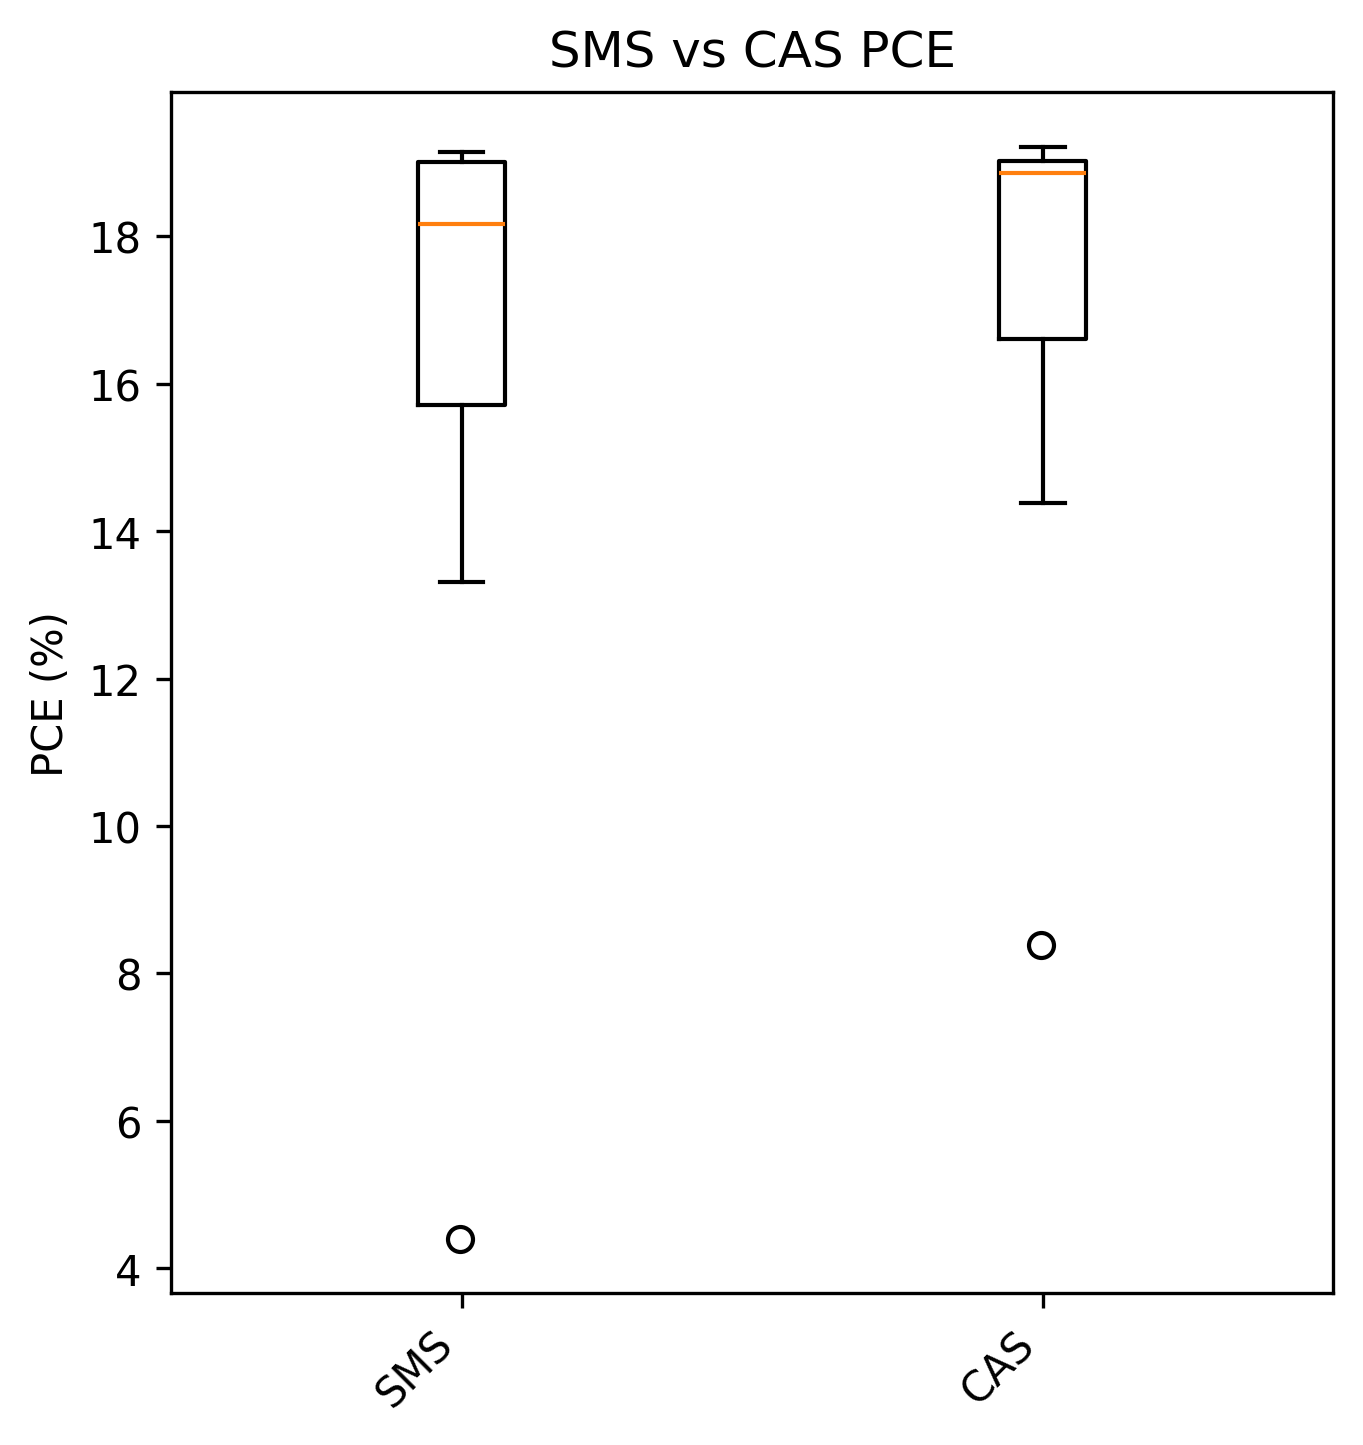

(1500, 1560)
(1500, 1560)


In [ ]:

box_plot = [average_sms, average_cas]
labels = ["SMS", "CAS"]

# Optional: compute stats using matplotlib's utility
stats = boxplot_stats(box_plot)

FIGSIZE = (5, 5.2)     # e.g. 8.6 cm × 6.6 cm  (single-column width)
DPI     = 300
fig, ax = plt.subplots(figsize=FIGSIZE, dpi=DPI)
bp = ax.boxplot(box_plot, flierprops=dict(marker='o', markersize=0))

for i, stat in enumerate(stats, start=1):
    outliers = stat['fliers']  # already identified!

    if len(outliers) > 0:
        jitter = 0.2 * (np.random.rand(len(outliers)) - 0.5)  # random horizontal spread
        x_positions = np.full(len(outliers), i) + jitter
        ax.scatter(x_positions, outliers, color='white', edgecolor='black', zorder=3)

# Label the x-axis
ax.set_xticks([1, 2])
ax.set_title("SMS vs CAS PCE")
ax.set_ylabel("PCE (%)")
ax.set_xticklabels(labels, rotation=45, ha='right')

fig.savefig("Comparison_PCE_BoxPlot.png", dpi=DPI, bbox_inches=None,   # make sure nothing trims your canvas
            pad_inches=0)
plt.show()
print(fig.canvas.get_width_height())

from PIL import Image
im = Image.open("Comparison_PCE_BoxPlot.png")
print(im.size)


In [ ]:
import numpy as np
from scipy import stats

plot_range = [x for x in range(8)]
printouts = []
all_diff = []
average_sms = []
average_cas = []
average_diff_device = []
plot_size = (10,4)
for cas, ss_file in zip(cas_files, sms_files):
    abs_diff, temp_sms, temp_cas = plot_difference(cas, ss_file, plot_range, plot_size = plot_size, remove_outliers=False, roll = 0, plot = False, time_limit=1)
    sms = np.mean(temp_sms)
    cas = np.mean(temp_cas)
    device_diff = abs(sms - cas)
    average_diff_device.append(device_diff)

    all_diff.extend(abs_diff)
    average_sms.extend(temp_sms)
    average_cas.extend(temp_cas)
    # print("sms:" ,temp_sms)
    # print("lit:" ,temp_cas)
    if cas and ss_file:
        try:
            printouts.append([np.min(abs_diff), np.argmin(abs_diff), np.mean(abs_diff), device_diff])

        except:
            pass

average_sms = np.asarray(average_sms)
average_cas = np.asarray(average_cas)
average_diff = average_sms - average_cas


bias = average_diff.mean()
mae = np.abs(average_diff).mean()
rmse = np.sqrt((average_diff**2).mean())
sd   = average_diff.std(ddof=1)
ci95 = stats.t.interval(0.95, len(average_diff)-1, loc=bias, scale=sd/np.sqrt(len(average_diff)))
loa  = (bias - 1.96*sd, bias + 1.96*sd)
ci95 = (round(ci95[0], 4), round(ci95[1], 4))
loa  = (round(loa[0],  4), round(loa[1],  4))
print(f"PCE bias = {bias:.4f}")
print(f"PCE mae = {mae:.4f}")
print(f"PCE rmse = {rmse:.4f}")
print(f"PCE ci95 = {ci95}")
print(f"PCE loa  = {loa}")
print()


# PCE bias = -0.0278
# PCE sd   = 1.7007
# PCE rmse = 1.6723
# PCE ci95 = (-0.662819110734372, 0.6072758972374629)
# PCE loa  = (-3.3611209689704675, 3.3055777554735584)


PCE bias = -0.9375
PCE mae = 0.9395
PCE rmse = 1.6028
PCE ci95 = (-2.2361, 0.3611)
PCE loa  = (-3.6896, 1.8146)



In [ ]:
errors = []
for i in range(8):
    plt.figure(figsize=plot_size)
    plt.ylim(bottom = -0, top = max_pce)
    plt.xlabel('Time [min]')
    plt.grid()

    plt.ylabel('PCE [%]')
    plt.subplots_adjust(left=0.086,
                        bottom=0.06,
                        right=0.844,
                        top=0.927,
                        wspace=0.2,
                        hspace=0.2)
    percent_error = float("inf")

    lineName = "PCE" + str(i + 1)
    if ss_file_path:
        plt.plot(time,data[:,i], label = lineName)
    if cas_time:
        plt.plot(cas_time[i], cas_pce[i], label = "cas" + str(i+1))
    if ss_file_path and cas_time:
        second_half_cas = cas_pce[i][len(cas_pce[i]) // 2:]
        average_second_half_cas = np.mean(second_half_cas)

        second_half = data[:,i][len(data[:,i]) // 2:]
        average_second_half = np.mean(second_half)

        percent_error = abs(average_second_half - average_second_half_cas) / abs(average_second_half_cas) * 100

    labelLines(plt.gca().get_lines(), zorder=2.5)
    plt.title("Percent Error: "+ str(percent_error))
    plt.legend(bbox_to_anchor=(1.15, 1))
for idx, i in enumerate(errors):
    print(idx+1, i)

NameError: name 'max_pce' is not defined

<Figure size 1000x400 with 0 Axes>

In [ ]:

cas_directory = ""
cas_directory = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\Mar-4-2025 4 device test\2025-03-04-- cas New PCB 4 Device comparison\devices\device_4"

all_files = []

if cas_directory != "":
    for root, dirs, files in os.walk(cas_directory):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                all_files.append(file_path)


cas_pce = []
cas_time = []

# Process each file



In [ ]:
#plot cas uneven length

cas_directory = ""
cas_directory = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\2024-11-06 --cas vs stability setup long test\nov6_2024 test 1\devices"



def process_files(cas_directory, all_files, pattern):
    all_files = []

    if cas_directory != "":
        for root, dirs, files in os.walk(cas_directory):
            for file in files:
                if file.endswith('.csv'):
                    file_path = os.path.join(root, file)
                    all_files.append(file_path)

    times = []
    pces = []
    for file_path in all_files:
        if pattern in file_path:
            try:
                data = np.genfromtxt(
                    file_path,
                    delimiter=',',
                    comments='#',
                    skip_header=0,
                    encoding='cp1252'  # Specify the correct encoding
                )
                pce = (data[:, 1] * data[:, 2] / 1000) / (0.1 * 0.128) * 100
                times.append(data[:, 0])
                pces.append(pce)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    pces = pces[::-1]
    return times, pces

def calculate_second_half_averages(pces):
    averages = []
    for pce in pces[:8]:  # Limit to first 8 files, as per the original code
        second_half = pce[len(pce) // 2:]
        averages.append(np.mean(second_half))
    return averages

# Process files for each pattern
cas_time1, cas_pce1 = process_files(cas_directory, all_files, "_3_0")
cas_time2, cas_pce2 = process_files(cas_directory, all_files, "_7_0")

# Calculate averages for each pattern
cas_beginning_avg = calculate_second_half_averages(cas_pce1)
cas_ending_avg = calculate_second_half_averages(cas_pce2)

print(cas_beginning_avg)
print(cas_ending_avg)


data = []

ss_file_path = ""
ss_file_path = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\2024-11-06 --cas vs stability setup long test\Nov-06-2024 13_50_53\Nov-06-2024 13_50_53ID2PnO.csv"
if ss_file_path != "":
    arr = np.loadtxt(ss_file_path,
                        delimiter=",",
                        dtype=str)


    headers = arr[6,:]
    header_dict = {value: index for index, value in enumerate(headers)}
    pce_indicies = [header_dict[value] for value in header_dict if "PCE" in value]
    arr = arr[7:, :]

    time = np.array(arr[:,header_dict["Time"]]).astype('float')
    time/=60
    pce_list = np.array(arr)
    pce_list = pce_list[:, pce_indicies]
    # pce_list = pce_list[:,0:-1]
    for i in range(len(pce_list)):
        pce_list[i] = [float(j) if j != " ovf" else 0.0 for j in pce_list[i]]
        pce_list[i] = [float(j) if j != "nan" else 0.0 for j in pce_list[i]]

    pce_list = pce_list.astype(float)

    data = pce_list #np.array(data).T
    # data *= 2.048 # comment line if not using mask

# min_time = min(time)*0.99
# max_time = max(time)*1.01
plot_size = (12,8)
min_pce = 0
max_pce = 15

plt.figure(figsize=plot_size)
# plt.xlim(min_time,max_time)
plt.ylim(bottom = min_pce, top = max_pce)
plt.xlabel('Time [min]')
plt.grid()

plt.ylabel('PCE [%]')
plt.subplots_adjust(left=0.086,
                    bottom=0.06,
                    right=0.844,
                    top=0.927,
                    wspace=0.2,
                    hspace=0.2)

errors = []

for i in range(8):
    lineName = "PCE" + str(i + 1)
    # print(np.array(pce_list[i]))
    if data != []:
        plt.plot(time,data[:,i], label = lineName)
    if i < len(cas_beginning_avg) and i < len(cas_ending_avg):
        # Calculate straight line
        y_values = [
            cas_beginning_avg[i],
            cas_ending_avg[i]
        ]
        print(y_values)
        x_values = [time[0], time[-1]]
        plt.plot(x_values, y_values, linestyle="--", label=f"cas {i + 1}")

print(np.mean(errors))

lines = plt.gca().get_lines()
x_min, x_max = plt.xlim()
num_lines = len(lines)
xvals = np.linspace(x_min + 0.1 * (x_max - x_min), x_max - 0.1 * (x_max - x_min), num_lines)
bold_font = FontProperties(weight='medium')
labelLines(
    lines,
    xvals=xvals,
    zorder=2.5,
    align=False,
    fontsize=11,
    fontproperties=bold_font
)
plt.legend(bbox_to_anchor=(1.15, 1))


In [ ]:
errors = []
for i in range(8):
    plt.figure(figsize=plot_size)
    plt.ylim(bottom = -0, top = max_pce)
    plt.xlabel('Time [min]')
    plt.grid()

    plt.ylabel('PCE [%]')
    plt.subplots_adjust(left=0.086,
                        bottom=0.06,
                        right=0.844,
                        top=0.927,
                        wspace=0.2,
                        hspace=0.2)


    lineName = "PCE" + str(i + 1)
    # print(np.array(pce_list[i]))
    plt.plot(time,data[:,i], label = lineName)
    if i < len(cas_beginning_avg) and i < len(cas_ending_avg):
        # Calculate straight line
        y_values = [
            cas_beginning_avg[i],
            cas_ending_avg[i]
        ]
        x_values = [time[0], time[-1]]
        plt.plot(x_values, y_values, linestyle="--", label=f"cas {i + 1}")

    last_portion = data[:,i][99*len(data[:,i]) // 100:]
    average_last_ss = np.mean(last_portion)

    percent_error = abs(average_last_ss - cas_ending_avg[i]) / abs(cas_ending_avg[i]) * 100
    errors.append(percent_error)

    labelLines(plt.gca().get_lines(), zorder=2.5)
    plt.title("Percent Error for final result: "+ str(percent_error))
    plt.legend(bbox_to_anchor=(1.15, 1))


for idx, i in enumerate(errors):
    print(idx+1, i)

In [ ]:
def plot_cas_only(cas_directory, pattern):
    # cas_directory = ""

    all_files = []

    if cas_directory != "":
        for root, dirs, files in os.walk(cas_directory):
            for file in files:
                if file.endswith('.csv'):
                    file_path = os.path.join(root, file)
                    all_files.append(file_path)


    cas_pce = []
    cas_time = []

    # Process each file
    for file_path in all_files:
        if pattern in file_path:
            try:
                data = np.genfromtxt(
                    file_path,
                    delimiter=',',
                    comments='#',
                    skip_header=0,
                    encoding='cp1252'  # Specify the correct encoding
                )
                pce = (data[:, 1] * data[:, 2] /1000) / (0.1*0.128)*100
                # data_with_pce= np.column_stack((data, pce))
                cas_time.append(data[:,0])
                cas_pce.append(pce)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    cas_pce = cas_pce[::-1]
    cas_time = cas_time[::-1]


    plt.figure(figsize=plot_size)
    plt.xlabel('Time [sec]')
    plt.grid()

    plt.ylabel('PCE [%]')
    plt.subplots_adjust(left=0.086,
                        bottom=0.06,
                        right=0.844,
                        top=0.927,
                        wspace=0.2,
                        hspace=0.2)

    errors = []

    for i in range(8):
        if cas_time:
            plt.plot(cas_time[i], cas_pce[i], label = "cas" + str(i+1))
            second_half_cas = cas_pce[i][len(cas_pce[i]) // 2:]
            average_second_half_cas = np.mean(second_half_cas)
            print(average_second_half_cas)

    print(np.mean(errors))

    lines = plt.gca().get_lines()
    x_min, x_max = plt.xlim()
    num_lines = len(lines)
    xvals = np.linspace(x_min + 0.1 * (x_max - x_min), x_max - 0.1 * (x_max - x_min), num_lines)
    bold_font = FontProperties(weight='medium')
    labelLines(
        lines,
        xvals=xvals,
        zorder=2.5,
        align=False,
        fontsize=11,
        fontproperties=bold_font
    )
    plt.legend(bbox_to_anchor=(1.15, 1))
plot_cas_only(r"C:\Users\achen\Dropbox\code\Stability-Setup\data\2024-11-06 --cas vs stability setup long test\nov6_2024 test 1\devices", "_3_0")
plot_cas_only(r"C:\Users\achen\Dropbox\code\Stability-Setup\data\2024-11-06 --cas vs stability setup long test\nov6_2024 test 1\devices", "_7_0")